# we use BERT for sequence classification, developed by Shitkov, with minor customization. See file bert_classifier_mipt.py

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

sdir = './scrub/'

from bert_dataset import CustomDataset
from bert_classifier_mipt import BertClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import logging as transformer_logging
transformer_logging.set_verbosity_error()

def get_clf_report(target, checkpoint, mname = 'tmp', num_epochs=6):
    
    '''
    we'll use this function to print classification report
    and loss-epoch dependency
    
    input is different target - raw text or preprocessed and epoch count
    '''

    thresh = 26 # get rid of classes with almost no examples. this condition is always true, left for compatibility

    t = pd.read_excel(f'{sdir}t4m_2022_05_05__21_59.xlsx')

    cn = t.groupby('class_name', as_index=False).size().query('size > @thresh')['class_name'].values.tolist()
    t = t.query('class_name in @cn')

    # encode target variable in multi-class style with label encoder
    le = LabelEncoder()
    classes = le.fit_transform(t['class_name'].unique())
    t['label'] = le.transform(t['class_name'])

    # split
    cols = ['text', 'label', 'content']
    train_data, valid_data = train_test_split(t[cols], test_size=0.3, random_state=42)
    test_data, valid_data = train_test_split(valid_data, test_size=0.5, random_state=42)
    
    print(30*'#')
    print('target =', target, 'checkpoint =', checkpoint)
    print()
    
    classifier = BertClassifier(
            model_path=checkpoint,
            tokenizer_path=checkpoint,
            n_classes=len(classes),
            epochs=num_epochs,
            model_save_path=f'{mname}.pt',
            distil = 'distil' in checkpoint
    )

    classifier.preparation(
            X_train=list(train_data[target]),
            y_train=list(train_data['label']),
            X_valid=list(valid_data[target]),
            y_valid=list(valid_data['label']), bsize=2
        )

    classifier.train()

    texts = list(test_data[target])
    labels = list(test_data['label'])

    predictions = [classifier.predict(t) for t in texts]

    print(classification_report(labels, predictions, target_names=[i.replace('_', ' ') for i in le.classes_]))

# compare training on raw data vs preprocessed with different checkpoints

##############################
target = content checkpoint = cointegrated/rubert-tiny



  0%|          | 0/6672 [00:00<?, ?it/s]

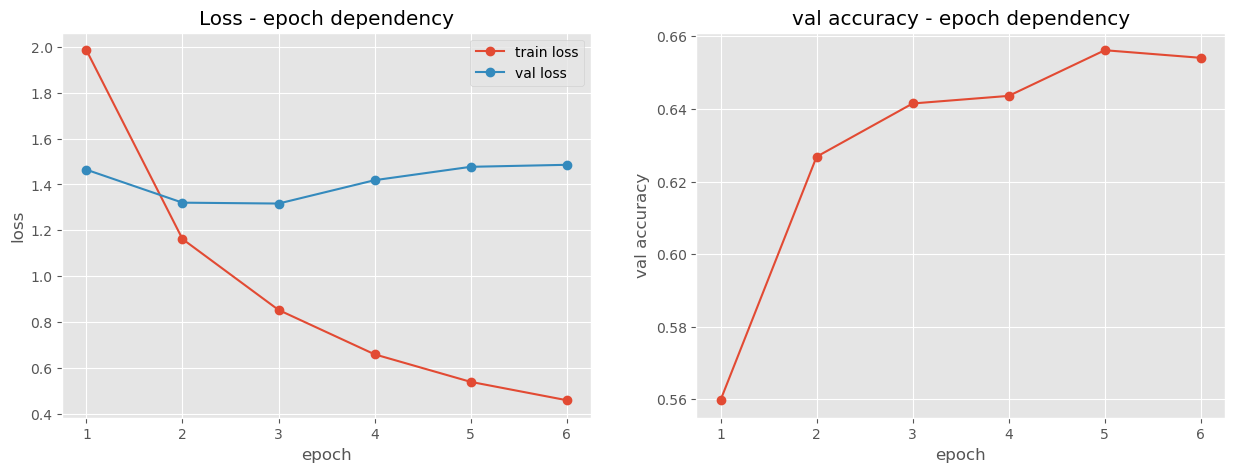

                                           precision    recall  f1-score   support

                                     uxui       0.56      0.54      0.55        26
                                  аккаунт       0.68      0.77      0.72        30
                       глюки баги тормоза       0.43      0.48      0.45        44
                 долгое ожидание доставки       0.50      0.60      0.55        20
                           доставка общее       0.64      0.63      0.64        43
                                   другое       0.62      0.56      0.59        52
                                   купоны       0.77      0.74      0.76        23
                               лояльность       0.84      0.96      0.90        49
не возвращаются деньги отмененного заказа       0.52      0.54      0.53        24
                               обновление       0.65      0.62      0.63        21
                             обслуживание       0.47      0.37      0.41        38
   

  0%|          | 0/6672 [00:00<?, ?it/s]

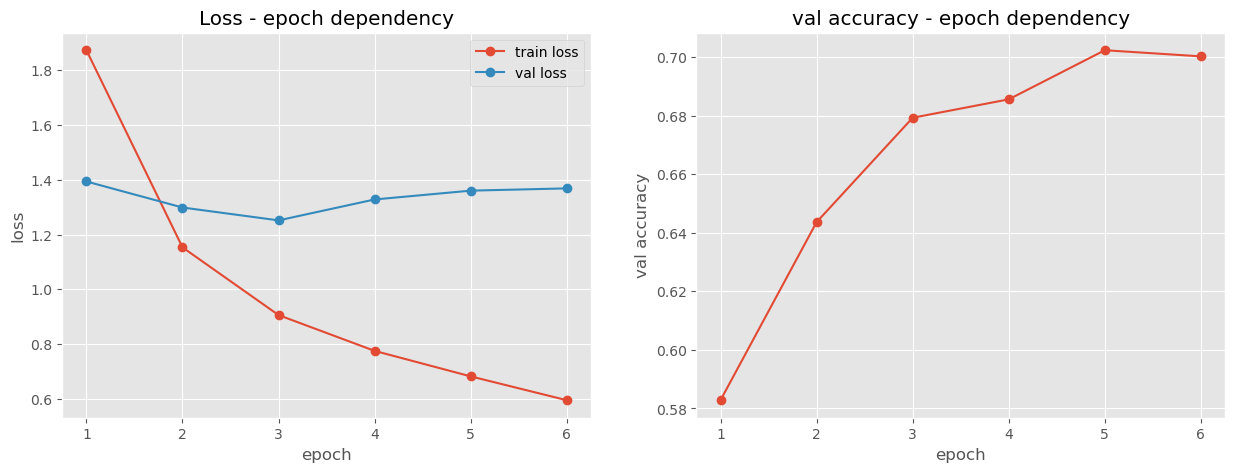

                                           precision    recall  f1-score   support

                                     uxui       0.57      0.50      0.53        26
                                  аккаунт       0.68      0.77      0.72        30
                       глюки баги тормоза       0.47      0.43      0.45        44
                 долгое ожидание доставки       0.56      0.50      0.53        20
                           доставка общее       0.70      0.70      0.70        43
                                   другое       0.64      0.67      0.65        52
                                   купоны       0.77      0.87      0.82        23
                               лояльность       0.88      0.94      0.91        49
не возвращаются деньги отмененного заказа       0.47      0.62      0.54        24
                               обновление       0.50      0.81      0.62        21
                             обслуживание       0.62      0.42      0.50        38
   

In [2]:
checkpoint = 'cointegrated/rubert-tiny'
get_clf_report('content', checkpoint)
get_clf_report('text', checkpoint)

##############################
target = content checkpoint = cointegrated/rubert-tiny2



  0%|          | 0/6672 [00:00<?, ?it/s]

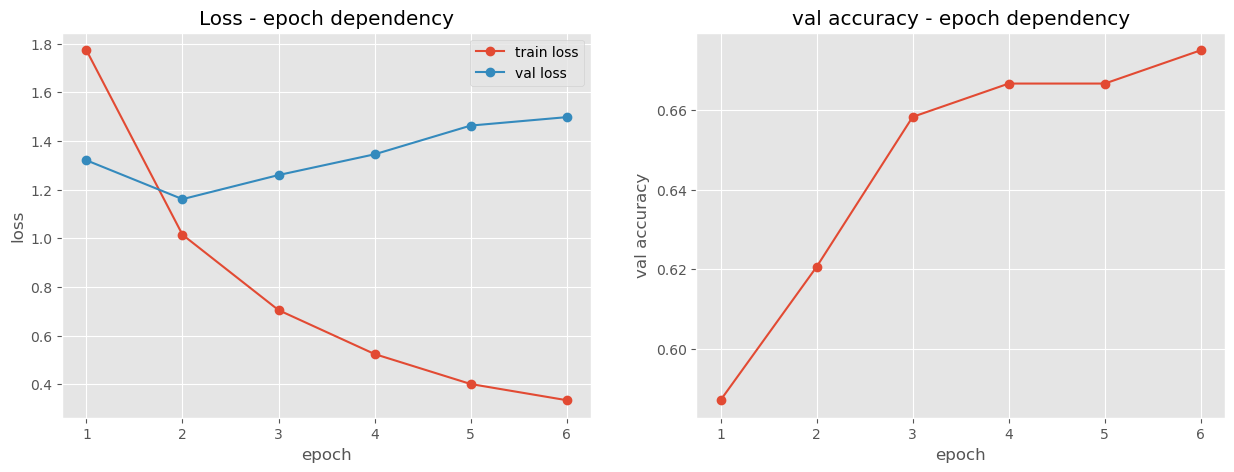

                                           precision    recall  f1-score   support

                                     uxui       0.53      0.65      0.59        26
                                  аккаунт       0.79      0.77      0.78        30
                       глюки баги тормоза       0.59      0.55      0.56        44
                 долгое ожидание доставки       0.55      0.60      0.57        20
                           доставка общее       0.65      0.56      0.60        43
                                   другое       0.70      0.62      0.65        52
                                   купоны       0.75      0.78      0.77        23
                               лояльность       0.84      0.94      0.88        49
не возвращаются деньги отмененного заказа       0.52      0.58      0.55        24
                               обновление       0.58      0.71      0.64        21
                             обслуживание       0.56      0.47      0.51        38
   

  0%|          | 0/6672 [00:00<?, ?it/s]

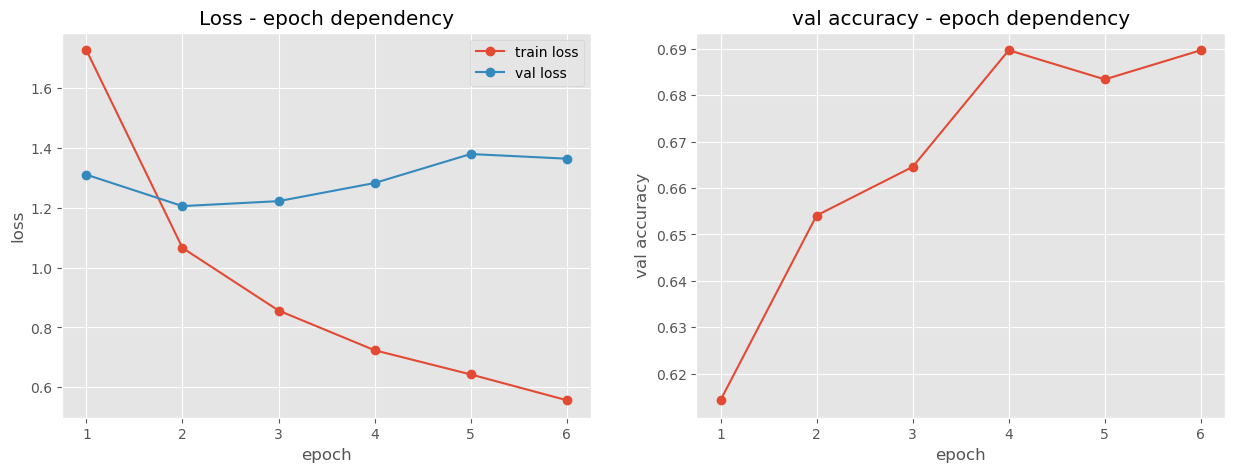

                                           precision    recall  f1-score   support

                                     uxui       0.50      0.54      0.52        26
                                  аккаунт       0.79      0.77      0.78        30
                       глюки баги тормоза       0.40      0.39      0.40        44
                 долгое ожидание доставки       0.61      0.55      0.58        20
                           доставка общее       0.72      0.65      0.68        43
                                   другое       0.65      0.63      0.64        52
                                   купоны       0.78      0.78      0.78        23
                               лояльность       0.88      0.94      0.91        49
не возвращаются деньги отмененного заказа       0.48      0.58      0.53        24
                               обновление       0.56      0.86      0.68        21
                             обслуживание       0.65      0.45      0.53        38
   

In [17]:
checkpoint = 'cointegrated/rubert-tiny2'
get_clf_report('content', checkpoint)
get_clf_report('text', checkpoint)

##############################
target = content checkpoint = DeepPavlov/distilrubert-small-cased-conversational



  0%|          | 0/6672 [00:00<?, ?it/s]

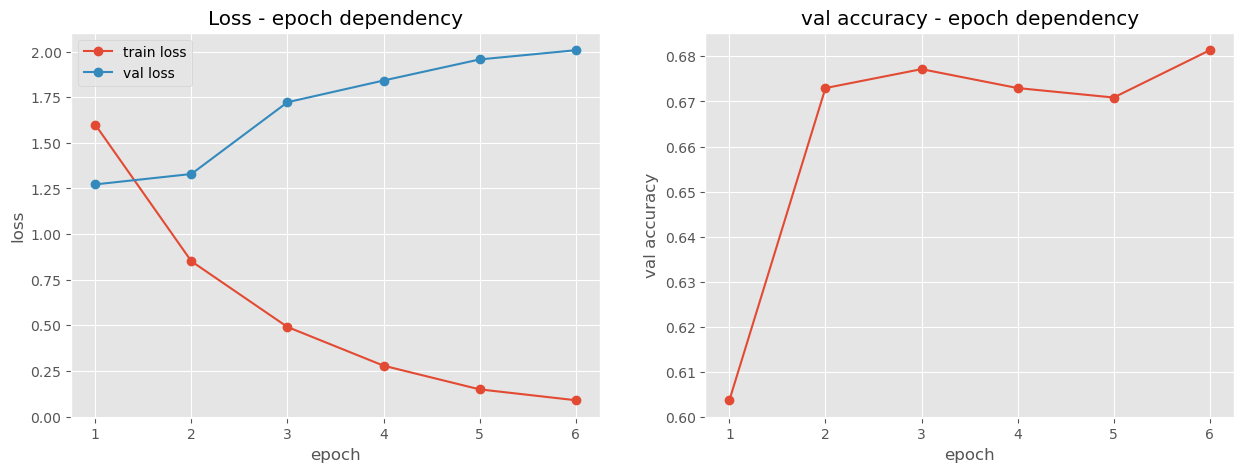

                                           precision    recall  f1-score   support

                                     uxui       0.64      0.62      0.63        26
                                  аккаунт       0.82      0.77      0.79        30
                       глюки баги тормоза       0.44      0.59      0.50        44
                 долгое ожидание доставки       0.55      0.60      0.57        20
                           доставка общее       0.68      0.65      0.67        43
                                   другое       0.72      0.69      0.71        52
                                   купоны       0.71      0.65      0.68        23
                               лояльность       0.80      0.90      0.85        49
не возвращаются деньги отмененного заказа       0.50      0.50      0.50        24
                               обновление       0.46      0.52      0.49        21
                             обслуживание       0.67      0.47      0.55        38
   

  0%|          | 0/6672 [00:00<?, ?it/s]

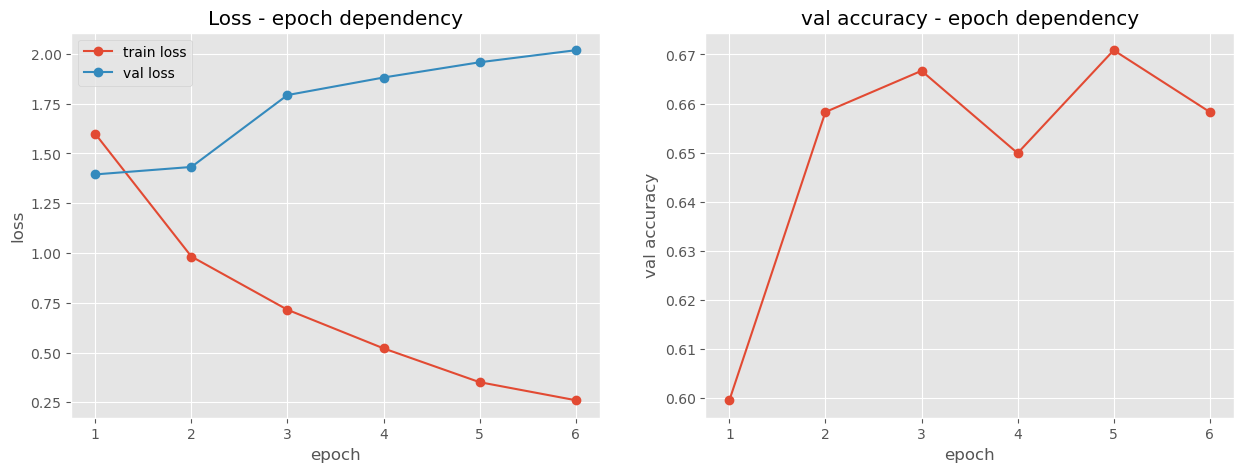

                                           precision    recall  f1-score   support

                                     uxui       0.44      0.54      0.48        26
                                  аккаунт       0.77      0.80      0.79        30
                       глюки баги тормоза       0.49      0.48      0.48        44
                 долгое ожидание доставки       0.52      0.60      0.56        20
                           доставка общее       0.71      0.63      0.67        43
                                   другое       0.75      0.63      0.69        52
                                   купоны       0.72      0.78      0.75        23
                               лояльность       0.89      0.96      0.92        49
не возвращаются деньги отмененного заказа       0.50      0.58      0.54        24
                               обновление       0.54      0.71      0.61        21
                             обслуживание       0.70      0.55      0.62        38
   

In [2]:
checkpoint = 'DeepPavlov/distilrubert-small-cased-conversational'
get_clf_report('content', checkpoint)
get_clf_report('text', checkpoint)